
# 02. Classification du réseau neuronal PyTorch

## Qu'est-ce qu'un problème de classification ?

Un [problème de classification](https://en.wikipedia.org/wiki/Statistical_classification) consiste à prédire si quelque chose est une chose ou une autre.

Par exemple, vous souhaiterez peut-être :

| Type de problème | Qu'est-ce que c'est? | Exemple |
| ----- | ----- | ----- |
| **Classification binaire** | La cible peut être l'une des deux options suivantes, par ex. oui ou non | Prédisez si une personne souffre ou non d’une maladie cardiaque en fonction de ses paramètres de santé. |
| **Classification multiclasse** | La cible peut être l'une des deux options suivantes | Décidez si la photo représente de la nourriture, une personne ou un chien. |
| **Classification multi-labels** | La cible peut se voir attribuer plusieurs options | Prédisez quelles catégories doivent être attribuées à un article Wikipédia (par exemple, mathématiques, sciences et philosophie). |


La classification, ainsi que la régression (prédiction d'un nombre, abordée dans le notebook précedent sont l'un des types de problèmes d'apprentissage automatique les plus courants.)

Dans ce cahier, nous allons résoudre différents problèmes de classification avec PyTorch.

En d’autres termes, prendre un ensemble d’entrées et prédire à quelle classe appartiennent ces ensembles d’entrées.

## Ce que nous allons aborder

Dans ce cahier, nous allons réitérer le workflow PyTorch que nous avons couvert precedement.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" alt="un organigramme de workflow pytorch" width=900/>

Sauf qu'au lieu d'essayer de prédire une ligne droite (prédire un nombre, également appelé problème de régression), nous travaillerons sur un **problème de classification**.

Plus précisément, nous allons couvrir :

| **Sujet** | **Contenu** |
| ----- | ----- |
| **0. Architecture d'un réseau de neurones de classification** | Les réseaux de neurones peuvent avoir presque n’importe quelle forme ou taille, mais ils suivent généralement un plan similaire. |
| **1. Préparer les données de classification binaire** | Les données peuvent être presque n'importe quoi, mais pour commencer, nous allons créer un simple ensemble de données de classification binaire. |
| **2. Construire un modèle de classification PyTorch** | Ici, nous allons créer un modèle pour apprendre des modèles dans les données, nous choisirons également une **fonction de perte**, un **optimiseur** et créerons une **boucle d'entraînement** spécifique à la classification. |
| **3. Ajustement du modèle aux données (entrainement)** | Nous avons des données et un modèle, laissons maintenant le modèle (essayer de) trouver des modèles dans les données (**entrainement**). |
| **4. Faire des prédictions et évaluer un modèle (inférence)** | Les modèles trouvés par notre modèle dans les données, comparons ses résultats aux données réelles (**tests**). |
| **5. Améliorer un modèle (du point de vue du modèle)** | Nous avons formé et évalué un modèle mais cela ne fonctionne pas, essayons quelques choses pour l'améliorer. |
| **6. Non-linéarité** | Jusqu'à présent, notre modèle n'a eu que la capacité de modéliser des lignes droites, qu'en est-il des lignes non linéaires (non droites) ? |
| **7. Réplication de fonctions non linéaires** | Nous avons utilisé des **fonctions non linéaires** pour nous aider à modéliser des données non linéaires, mais à quoi ressemblent-elles ? |
| **8. Rassembler le tout pour une classification multiclasse** | Mettons tout ce que nous avons fait jusqu'à présent pour la classification binaire avec un problème de classification multi-classes. |

## 0. Architecture d'un réseau de neurones de classification

Avant de commencer à écrire du code, examinons l'architecture générale d'un réseau neuronal de classification.

| **Hyperparamètre** | **Classification binaire** | **Classification multiclasse** |
| --- | --- | --- |
| **Forme de la couche d'entrée** (`in_features`) | Identique au nombre de caractéristiques (par exemple 5 pour l'âge, le sexe, la taille, le poids, le statut tabagique dans la prévision des maladies cardiaques) | Identique à la classification binaire |
| **Couche(s) cachée(s)** | Spécifique au problème, minimum = 1, maximum = illimité | Identique à la classification binaire |
| **Neurones par couche cachée** | Spécifique au problème, généralement 10 à 512 | Identique à la classification binaire |
| **Forme de la couche de sortie** (`out_features`) | 1 (une classe ou l'autre) | 1 par cours (ex. 3 pour la nourriture, la photo d'une personne ou d'un chien) |
| **Activation de la couche cachée** | Habituellement [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (unité linéaire rectifiée) mais [peut être bien d'autres](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Identique à la classification binaire |
| **Activation de sortie** | [Sigmoïde](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) dans PyTorch) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) dans PyTorch) |
| **Fonction de perte** | [Crossentropie binaire](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) dans PyTorch) | Entropie croisée ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) dans PyTorch) |
| **Optimiseur** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (descente de gradient stochastique), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (voir [`torch.optim`](https://pytorch.org/docs/stable/optim.html) pour plus d'options) | Identique à la classification binaire |

Bien entendu, cette liste d'ingrédients de composants de réseau neuronal de classification variera en fonction du problème sur lequel vous travaillez.

## 1. Créez des données de classification et préparez-les

Commençons par créer quelques données.

Nous utiliserons la méthode [`make_circles()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) de Scikit-Learn pour générer deux cercles avec des points de couleurs différentes.

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
print(f"X features:\n{X[:5]}")
print(f"y labels:\n{y[:5]}")

X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
y labels:
[1 1 1 1 0]


In [3]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


Il semble que chaque paire de fonctionnalités « X » (« X1 » et « X2 ») a une valeur d'étiquette (`y`) de 0 ou 1.

Cela nous indique que notre problème est une **classification binaire** puisqu'il n'y a que deux options (0 ou 1).

Combien y a-t-il de valeurs de chaque classe ?

In [4]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

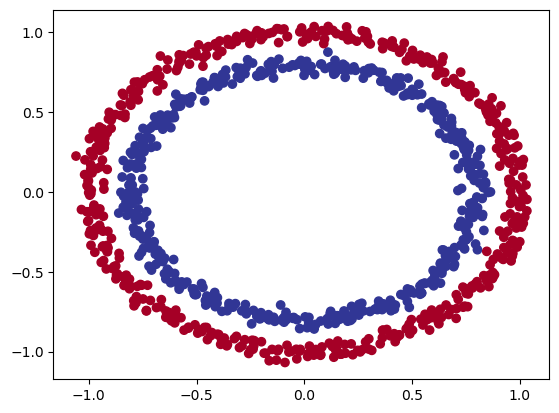

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

Très bien, on dirait que nous avons un problème à résoudre.

Voyons comment nous pourrions construire un réseau neuronal PyTorch pour classer les points en rouge (0) ou bleu (1).

> **Remarque :** Cet ensemble de données est souvent considéré comme un **problème de jouet** (un problème utilisé pour essayer et tester des choses) dans l'apprentissage automatique.
>
> Mais cela représente la clé majeure de la classification, vous avez une sorte de donnée représentée sous forme de valeurs numériques et vous aimeriez construire un modèle capable de la classer, dans notre cas, de la séparer en points rouges ou bleus.

### 1.1 Formes d'entrée et de sortie

L’une des erreurs les plus courantes en apprentissage profond est celle des erreurs de forme.

Une inadéquation des formes des tenseurs et des opérations tensorielles entraîne des erreurs dans vos modèles.

Nous allons en voir beaucoup tout au long du cours.

Et il n’existe aucun moyen infaillible de garantir qu’ils ne se produiront pas, ils se produiront.

À la place, vous pouvez vous familiariser continuellement avec la forme des données avec lesquelles vous travaillez.

J'aime y faire référence sous le nom de formes d'entrée et de sortie.

Demande toi:

"Quelles formes sont mes entrées et quelles formes sont mes sorties ?"

Découvrons-le.

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

On dirait que nous avons une correspondance sur la première dimension de chacun.

Il y a 1 000 « X » et 1 000 « y ».

Mais quelle est la deuxième dimension sur « X » ?

Il est souvent utile de visualiser les valeurs et les formes d'un seul échantillon (caractéristiques et étiquettes).

Cela vous aidera à comprendre les formes d’entrée et de sortie que vous attendez de votre modèle.

In [7]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


Cela nous indique que la deuxième dimension de « X » signifie qu'il a deux caractéristiques (vecteur) alors que « y » a une seule caractéristique (scalaire).

Nous avons deux entrées pour une sortie.

### 1.2 Transformez les données en tenseurs et créez des répartitions d'entraînement et de test


Nous avons étudié les formes d'entrée et de sortie de nos données, préparons-les maintenant pour être utilisées avec PyTorch et pour la modélisation.

Plus précisément, nous devrons :
1. Transformez nos données en tenseurs (actuellement, nos données sont dans des tableaux NumPy et PyTorch préfère travailler avec les tenseurs PyTorch).
2. Divisez nos données en ensembles d'entraînement et de test (nous entraînerons un modèle sur l'ensemble d'entraînement pour apprendre les modèles entre « X » et « y », puis évaluerons ces modèles appris sur l'ensemble de données de test).

In [8]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

Maintenant que nos données sont au format tensoriel, divisons-les en ensembles d'entraînement et de test.

Pour ce faire, utilisons la fonction utile [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de Scikit-Learn.

Nous utiliserons `test_size=0.2` (80 % d'entrainement, 20 % de tests) et comme la répartition se produit de manière aléatoire dans les données, utilisons `random_state=42` pour que la répartition soit reproductible.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Construire un modèle

Nous avons quelques données prêtes, il est maintenant temps de créer un modèle.

Nous allons le décomposer en quelques parties.

1. Configuration du code indépendant de l'appareil (afin que notre modèle puisse fonctionner sur CPU ou GPU s'il est disponible).
2. Construire un modèle en sous-classant `nn.Module`.
3. Définition d'une fonction de perte et d'un optimiseur.
4. Créer une boucle d'entrainement (ce sera dans la section suivante).

La bonne nouvelle est que nous avons déjà suivi toutes les étapes ci-dessus dans le cahier 01.

Sauf que maintenant, nous allons les ajuster pour qu'ils fonctionnent avec un ensemble de données de classification.

Commençons par importer PyTorch et `torch.nn` ainsi que par configurer le code indépendant de l'appareil.

In [10]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Excellent, maintenant « device » est configuré, nous pouvons l'utiliser pour toutes les données ou modèles que nous créons et PyTorch le gérera sur le CPU (par défaut) ou le GPU s'il est disponible.

Et si on créait un modèle ?

Nous voudrons un modèle capable de gérer nos données « X » comme entrées et de produire quelque chose sous la forme de nos données « y » comme sorties.

En d'autres termes, étant donné « X » (caractéristiques), nous voulons que notre modèle prédise « y » (étiquette).

Cette configuration dans laquelle vous disposez de fonctionnalités et d'étiquettes est appelée **apprentissage supervisé**. Parce que vos données indiquent à votre modèle quels résultats doivent recevoir une certaine entrée.

Pour créer un tel modèle, il devra gérer les formes d'entrée et de sortie de « X » et « y ».

Vous vous souvenez de la façon dont j'ai dit que les formes d'entrée et de sortie sont importantes ? Nous verrons ici pourquoi.

Créons une classe modèle qui :
1. Sous-classes `nn.Module` (presque tous les modèles PyTorch sont des sous-classes de `nn.Module`).
2. Crée 2 couches `nn.Linear` dans le constructeur capables de gérer les formes d'entrée et de sortie de `X` et `y`.
3. Définit une méthode `forward()` contenant le calcul de passe avant du modèle.
4. Instancie la classe de modèle et l'envoie au « périphérique » cible.

In [11]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

Que se passe t-il ici?

Nous avons déjà vu quelques-unes de ces étapes.

Le seul changement majeur concerne ce qui se passe entre « self.layer_1 » et « self.layer_2 ».

`self.layer_1` prend 2 fonctionnalités d'entrée `in_features=2` et produit 5 fonctionnalités de sortie `out_features=5`.

C'est ce qu'on appelle avoir 5 **unités cachées** ou **neurones**.

Cette couche fait passer les données d'entrée de 2 fonctionnalités à 5 fonctionnalités.

Pourquoi faire ceci?

Cela permet au modèle d'apprendre des modèles à partir de 5 nombres plutôt que de seulement 2 nombres, ce qui *potentiellement* conduit à de meilleurs résultats.


Le nombre d'unités cachées que vous pouvez utiliser dans les couches de réseau neuronal est un **hyperparamètre** (une valeur que vous pouvez définir vous-même) et vous ne devez utiliser aucune valeur fixe.

En général, plus c'est mieux, mais il y a aussi le trop. Le montant que vous choisirez dépendra de votre type de modèle et de l'ensemble de données avec lequel vous travaillez.

Puisque notre ensemble de données est petit et simple, nous le garderons petit.

La seule règle avec les unités cachées est que la couche suivante, dans notre cas, `self.layer_2` doit prendre le même `in_features` que la couche précédente `out_features`.

C'est pourquoi `self.layer_2` a `in_features=5`, il prend les `out_features=5` de `self.layer_1` et effectue un calcul linéaire sur eux, les transformant en `out_features=1` (la même forme que ` y`).

![Un exemple visuel de ce à quoi ressemble un réseau neuronal de classification avec activation linéaire sur le terrain de jeu tensorflow](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-linear-activation.png)

*Un exemple visuel de ce à quoi ressemble un réseau neuronal de classification similaire à celui que nous venons de construire. Essayez d'en créer un sur le [site Web TensorFlow Playground](https://playground.tensorflow.org/).*

Vous pouvez également faire la même chose que ci-dessus en utilisant [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html).

`nn.Sequential` effectue un calcul direct des données d'entrée à travers les couches dans l'ordre dans lequel elles apparaissent.

In [12]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

`nn.Sequential` est adapter pour les calculs simples, cependant, comme le dit l'espace de noms, il *toujours* s'exécute dans un ordre séquentiel.

Donc, si vous souhaitez que quelque chose d'autre se produise (plutôt qu'un simple calcul séquentiel simple), vous souhaiterez définir votre propre sous-classe `nn.Module` personnalisée.

Maintenant que nous avons un modèle, voyons ce qui se passe lorsque nous y transmettons des données.

In [13]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.2513],
        [-0.2504],
        [-0.1656],
        [-0.2759],
        [-0.0260],
        [-0.0265],
        [-0.1347],
        [-0.0820],
        [-0.1716],
        [-0.2488]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


Il semble qu'il y ait le même nombre de prédictions qu'il y a d'étiquettes de test, mais les prédictions ne semblent pas avoir la même forme que les étiquettes de test.

Nous pouvons prendre quelques mesures pour résoudre ce problème, nous les verrons plus tard.

### 2.1 Configurer la fonction de perte et l'optimiseur

Nous avons déjà configuré une perte (également appelée critère ou fonction de coût) et un optimiseur dans le notbook precedent. Mais différents types de problèmes nécessitent différentes fonctions de perte.

Par exemple, pour un problème de régression (prédiction d'un nombre), vous pouvez utiliser la perte d'erreur absolue moyenne (MAE).

Et pour un problème de classification binaire (comme le nôtre), vous utiliserez souvent [l'entropie croisée binaire](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) comme fonction de perte.

Cependant, le même algorithme d’optimisation peut souvent être utilisée dans différents problématiques.

Par exemple, l'optimiseur de descente de gradient stochastique (SGD, `torch.optim.SGD()`) peut être utilisé pour une gamme de problèmes, et il en va de même pour l'optimiseur Adam (`torch.optim.Adam()`).

| Fonction de perte/Optimiseur | Type de problème | Code PyTorch |
| ----- | ----- | ----- |
| Optimiseur de descente de gradient stochastique (SGD) | Classification, régression, bien d'autres. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimiseur | Classification, régression, bien d'autres. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Perte d'entropie croisée binaire | Classement binaire | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) ou [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Perte d'entropie croisée | Classification multi-classes | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Erreur absolue moyenne (MAE) ou perte L1 | Régression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) |
| Erreur quadratique moyenne (MSE) ou perte L2 | Régression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |

*Tableau des différentes fonctions de perte et optimiseurs, il y en a d'autres, mais vous verrez quelques-unes des plus courantes.*

Puisque nous travaillons avec un problème de classification binaire, utilisons une fonction de perte d'entropie croisée binaire.

> **Remarque :** Rappelez-vous qu'une **fonction de perte** est ce qui mesure à quel point les prédictions de votre modèle sont *fausses* : plus la perte est élevée, plus votre modèle est mauvais.
>
> De plus, la documentation PyTorch fait souvent référence aux fonctions de perte comme « critère de perte » ou « critère », ce sont toutes des manières différentes de décrire la même chose.

PyTorch a deux implémentations d'entropie croisée binaire :
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Crée une fonction de perte qui mesure l'entropie croisée binaire entre la cible (étiquette) et entrée (caractéristiques).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - C'est la même chose que ci-dessus sauf qu'il a une couche sigmoïde ( [`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) intégré (nous verrons bientôt ce que cela signifie).

Lequel devriez-vous utiliser ?

La [documentation pour `torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) indique qu'elle est numériquement plus stable que l'utilisation de `torch.nn. BCELoss()` après une couche `nn.Sigmoid`.

Cependant, pour une utilisation avancée, vous souhaiterez peut-être séparer la combinaison de `nn.Sigmoid` et `torch.nn.BCELoss()`.

Sachant cela, créons une fonction de perte et un optimiseur.

Pour l'optimiseur, nous utiliserons `torch.optim.SGD()` pour optimiser les paramètres du modèle avec un taux d'apprentissage de 0,1.

In [14]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

Créons maintenant également une **métrique d'évaluation**.

Une métrique d'évaluation peut être utilisée pour offrir une autre perspective sur l'évolution de votre modèle.

Si une fonction de perte mesure à quel point votre modèle est *incorrect*, les mesures d'évaluation estime à quel point il est *correct*. Les mesures d’évaluation offrent une perspective différente sur le modèle.

Il existe plusieurs mesures d'évaluation qui peuvent être utilisées pour résoudre des problèmes de classification, mais commençons par la **précision**.

L'accuracy peut être mesurée en divisant le nombre total de prédictions correctes par le nombre total de prédictions.

Par exemple, un modèle qui fait 99 prédictions correctes sur 100 aura une accuracy de 99 %.

Écrivons une fonction pour ce faire.

In [15]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

## 3. Entrainement

D'accord, maintenant que nous avons une fonction de perte et un optimiseur prêts à l'emploi, formons un modèle.

Vous souvenez-vous des étapes d'une boucle d'entrainement PyTorch ?

Sinon, voici un rappel.

Étapes de l'entrainement :

<details>
     <summary>Étapes de la boucle d'entraînement PyTorch</summary>
     <ol>
         <li><b>Passer en avant</b> : le modèle parcourt toutes les données d'entraînement une seule fois, effectuant son
             Fonction <code>forward()</code>
             calculs (<code>model(x_train)</code>).
         </li>
         <li><b>Calculer la perte</b> : les sorties du modèle (prédictions) sont comparées à la vérité terrain et évaluées.
             pour voir comment
             ils ont tort (<code>loss = loss_fn(y_pred, y_train</code>).</li>
         <li><b>Gradients annulés</b> : les gradients des optimiseurs sont initialisé à zéro (ils sont accumulés par défaut) afin d' être recalculé pour l'étape suivante (<code>optimizer.zero_grad()</code>).</li>
         <li><b>Effectuer une rétropropagation sur la perte</b> : calcule le gradient de la perte en respectant chaque modèle
             paramètre à
             être mis à jour (chaque paramètre
             avec <code>requires_grad=True</code>). C'est ce qu'on appelle la <b>rétropropagation</b>, donc "à l'envers".
             (<code>loss.backward()</code>).</li>
         <li><b>Étape de l'optimiseur (descente de gradient)</b> - Mettre à jour les paramètres avec <code>requires_grad=True</code>
             en utilisant le gradient de la fonction perte afin de les améliorer (<code>optimizer.step()</code>).</li>
     </ol>
</details>

### 3.1 Passer des sorties brutes du modèle aux étiquettes prédites (logits -> probabilités de prédiction -> étiquettes de prédiction)

Avant les étapes de la boucle d'entraînement, voyons ce qui sort de notre modèle lors de la passe avant (la passe avant est définie par la méthode `forward()`).

Pour ce faire, transmettons quelques données au modèle.

In [16]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2513],
        [-0.2504],
        [-0.1656],
        [-0.2759],
        [-0.0260]], grad_fn=<SliceBackward0>)

Étant donné que notre modèle n'a pas été entraîné, ces sorties sont fondamentalement aléatoires.

Mais *qu'est-ce* que c'est ?

Ils sont le résultat de notre méthode `forward()`.

Ce qui implémente deux couches de `nn.Linear()` qui appelle en interne l'équation suivante :

$$
\mathbf{y} = x \cdot \mathbf{Poids}^T + \mathbf{bias}
$$

Les *sorties brutes* (non modifiées) de cette équation ($\mathbf{y}$) et, à leur tour, les sorties brutes de notre modèle sont souvent appelées [**logits**](https://datascience.stackexchange.com/a/31045).

C'est ce que notre modèle génère ci-dessus lorsqu'il prend en compte les données d'entrée ($x$ dans l'équation ou « X_test » dans le code), logits.

Ces chiffres sont toutefois difficiles à interpréter.

Nous aimerions avoir des chiffres comparables à nos étiquettes de vérité.

Pour obtenir les sorties brutes (logits) de notre modèle sous une telle forme, nous pouvons utiliser la [fonction d'activation sigmoïde](https://pytorch.org/docs/stable/generated/torch.sigmoid.html).

Essayons-le.

In [17]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4375],
        [0.4377],
        [0.4587],
        [0.4315],
        [0.4935]], grad_fn=<SigmoidBackward0>)

D'accord, il semble que les sorties aient désormais une certaine cohérence (même si elles sont toujours aléatoires).

Elles se présentent désormais sous la forme de **probabilités de prédiction** (je les appelle généralement « y_pred_probs »), en d'autres termes, les valeurs indiquent désormais dans quelle mesure le modèle pense que le point de données appartient à une classe ou à une autre.

Dans notre cas, puisqu'il s'agit d'une classification binaire, nos sorties idéales sont 0 ou 1.

Ces valeurs peuvent donc être considérées comme une limite de décision.

Plus il est proche de 0, plus le modèle pense que l’échantillon appartient à la classe 0, plus il est proche de 1, plus le modèle pense que l’échantillon appartient à la classe 1.

Plus précisément :
* Si `y_pred_probs` >= 0,5, `y=1` (classe 1)
* Si `y_pred_probs` < 0,5, `y=0` (classe 0)

Pour transformer nos probabilités de prédiction en étiquettes de prédiction, nous pouvons arrondir les sorties de la fonction d'activation sigmoïde.

In [18]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

Excellent! Il semble maintenant que les prédictions de notre modèle se présentent sous la même forme que nos étiquettes de vérité (`y_test`).

In [19]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

Cela signifie que nous pourrons comparer les prédictions de nos modèles aux étiquettes de test pour voir si tout se passe bien.

Pour récapituler, nous avons converti les sorties brutes (logits) de notre modèle en probabilités de prédiction à l'aide d'une fonction d'activation sigmoïde.

Et puis converti les probabilités de prédiction en étiquettes de prédiction en les arrondissant.

> **Remarque :** L'utilisation de la fonction d'activation sigmoïde est souvent réservée aux logits de classification binaire. Pour la classification multi-classes, nous envisagerons d'utiliser la [fonction d'activation softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html).
>
> Et l'utilisation de la fonction d'activation sigmoïde n'est pas requise lors du passage des sorties brutes de notre modèle au `nn.BCEWithLogitsLoss` (le "logits" dans la perte de logits est dû au fait qu'il fonctionne sur la sortie brute des logits du modèle), c'est parce qu'il a une fonction sigmoïde intégrée.

### 3.2 Construire une boucle de formation et de test

Très bien, nous avons expliqué comment prendre les sorties brutes de notre modèle et les convertir en étiquettes de prédiction. Créons maintenant une boucle de formation.

Commençons par nous entraîner pendant 100 époques et afficher la progression du modèle toutes les 10 époques.

In [20]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69708, Accuracy: 49.50% | Test loss: 0.69511, Test acc: 49.50%
Epoch: 10 | Loss: 0.69549, Accuracy: 45.25% | Test loss: 0.69350, Test acc: 46.00%
Epoch: 20 | Loss: 0.69477, Accuracy: 47.62% | Test loss: 0.69280, Test acc: 48.00%
Epoch: 30 | Loss: 0.69439, Accuracy: 47.88% | Test loss: 0.69250, Test acc: 50.50%
Epoch: 40 | Loss: 0.69417, Accuracy: 48.38% | Test loss: 0.69237, Test acc: 51.00%
Epoch: 50 | Loss: 0.69401, Accuracy: 49.00% | Test loss: 0.69234, Test acc: 51.50%
Epoch: 60 | Loss: 0.69388, Accuracy: 48.75% | Test loss: 0.69235, Test acc: 52.00%
Epoch: 70 | Loss: 0.69378, Accuracy: 48.88% | Test loss: 0.69238, Test acc: 51.00%
Epoch: 80 | Loss: 0.69369, Accuracy: 49.12% | Test loss: 0.69243, Test acc: 50.50%
Epoch: 90 | Loss: 0.69362, Accuracy: 49.25% | Test loss: 0.69249, Test acc: 50.00%


Que remarquez-vous sur les performances de notre modèle ?

Il semble que les étapes de formation et de test soient bien passées, mais les résultats ne semblent pas avoir trop bougé.

La précision dépasse à peine 50 % à chaque fractionnement de données.

Et parce que nous travaillons avec un problème de classification binaire équilibrée, cela signifie que notre modèle fonctionne aussi bien qu'une estimation aléatoire (avec 500 échantillons de classe 0 et de classe 1, un modèle prédisant la classe 1 à chaque fois atteindrait une précision de 50 %).

## 4. Faites des prédictions et évaluez le modèle

D'après les métriques, il semble que notre modèle soit une supposition aléatoire.

Faisons un tracé des prédictions de notre modèle, des données sur lesquelles il essaie de prédire et de la limite de décision qu'il crée pour savoir si quelque chose est de classe 0 ou de classe 1.

In [21]:
import numpy as np

In [22]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source -https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [23]:
# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

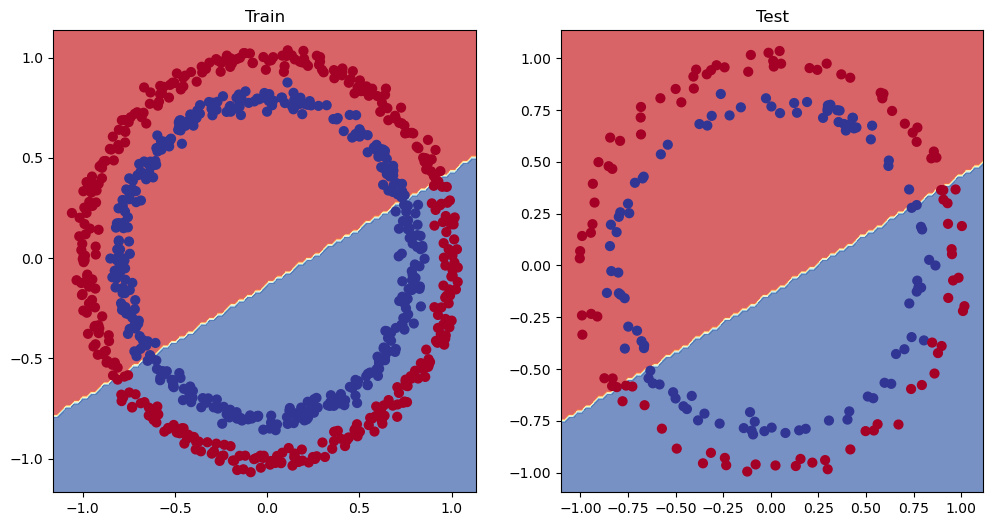

In [24]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Nous ayons trouvé la cause du problème de performances du modèle.

Il essaie actuellement de diviser les points rouges et bleus en utilisant une ligne droite...

Cela explique la précision de 50%. Puisque nos données sont circulaires, tracer une ligne droite peut au mieux les couper au milieu.

En termes d'apprentissage automatique, notre modèle est **sous-ajusté**, ce qui signifie qu'il n'apprend pas de modèles prédictifs à partir des données.

Comment pourrions-nous améliorer cela ?

## 5. Améliorer un modèle (du point de vue du modèle)

Essayons de résoudre le problème de sous-ajustement de notre modèle.

En nous concentrant spécifiquement sur le modèle (et non sur les données), nous pouvons procéder de plusieurs manières.

| Technique d'amélioration du modèle* | Qu'est ce que ça fait? |
| ----- | ----- |
| **Ajouter plus de calques** | Chaque couche augmente *potentiellement* les capacités d'apprentissage du modèle, chaque couche étant capable d'apprendre une sorte de nouveau modèle dans les données, plus de couches sont souvent considérées comme rendant votre réseau neuronal *plus profond*. |
| **Ajouter plus d'unités cachées** | Semblable à ce qui précède, plus d'unités cachées par couche signifie une augmentation *potentielle* des capacités d'apprentissage du modèle, plus d'unités cachées sont souvent considérées comme rendant votre réseau neuronal *plus large*. |
| **Convient pour plus longtemps (plus d'époques)** | Votre modèle pourrait en apprendre davantage s’il avait plus de possibilités d’examiner les données. |
| **Modification des fonctions d'activation** | Certaines données ne peuvent tout simplement pas être ajustées uniquement avec des lignes droites (comme ce que nous avons vu), l'utilisation de fonctions d'activation non linéaires peut aider (indice, indice). |
| **Modifier le taux d'apprentissage** | Moins spécifique au modèle, mais toujours lié, le taux d'apprentissage de l'optimiseur décide dans quelle mesure un modèle doit modifier ses paramètres à chaque étape, trop et le modèle surcorrige, trop peu et il n'apprend pas assez. |
| **Modifier la fonction de perte** | Encore une fois, moins spécifiques au modèle mais néanmoins importants, différents problèmes nécessitent différentes fonctions de perte. Par exemple, une fonction binaire de perte d'entropie croisée ne fonctionnera pas avec un problème de classification multi-classes. |
| **Utiliser l'apprentissage par transfert** | Prenez un modèle pré-entraîné à partir d'un domaine problématique similaire au vôtre et ajustez-le à votre propre problème. Nous couvrons l'apprentissage par transfert dans [notebook 06](https://www.learnpytorch.io/06_pytorch_transfer_learning/). |

> **Remarque :** *Comme vous pouvez ajuster tous ces éléments à la main, ils sont appelés **hyperparamètres**.
>
> Et c'est aussi là qu'intervient la moitié de l'art et de la science de l'apprentissage automatique. Il n'y a pas vraiment de moyen de savoir ici quelle est la meilleure combinaison de valeurs pour votre projet, il est préférable de suivre la devise du data scientist "expérimenter, expérimenter, expérimenter".

Voyons ce qui se passe si nous ajoutons une couche supplémentaire à notre modèle, l'ajustons plus longtemps (`epochs=1000` au lieu de `epochs=100`) et augmentons le nombre d'unités cachées de `5` à `10`.

Nous suivrons les mêmes étapes que ci-dessus, mais avec quelques hyperparamètres modifiés.

In [25]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

Maintenant que nous avons un modèle, nous allons recréer une fonction de perte et une instance d'optimiseur, en utilisant les mêmes paramètres qu'auparavant.

In [26]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

Modèle, optimiseur et fonction de perte prêts, faisons une boucle d'entraînement.

Cette fois, nous allons entraîner le réseau plus longtemps (`epochs=1000` vs `epochs=100`) et voir si cela améliore notre modèle.

In [27]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


What? Our model trained for longer and with an extra layer but it still looks like it didn't learn any patterns better than random guessing.

Let's visualize.

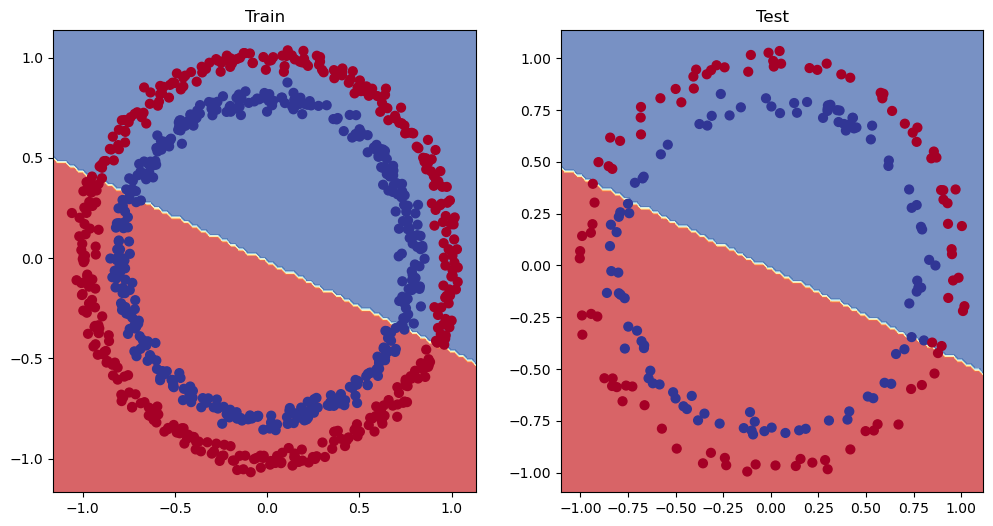

In [28]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 6. La pièce manquante : la non-linéarité

Nous avons remarquer que notre modèle peut tracer des lignes droites (linéaires), grâce à ses couches linéaires.

Mais que diriez-vous de lui donner la capacité de tracer des lignes non droites (non linéaires) ?

Comment? en utilisant des fonctions d'activation non-linéaire.

### 6.1 Recréer des données non linéaires (cercles rouges et bleus)

Tout d’abord, recréons les données pour repartir à zéro. Nous utiliserons la même configuration que précédemment.

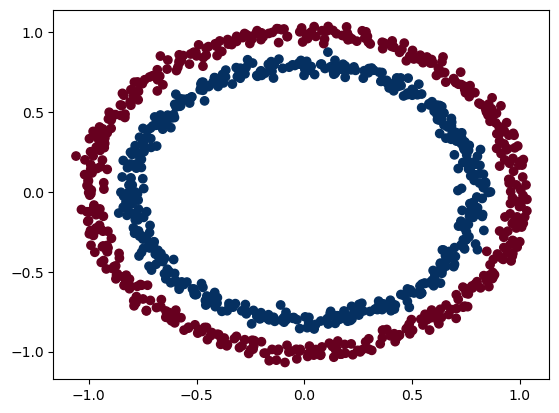

In [29]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

Bon! Divisons-le maintenant en ensembles de formation et de test en utilisant 80 % des données pour la formation et 20 % pour les tests.

In [30]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Construire un modèle avec non-linéarité

Quel type de motif pensez-vous pouvoir dessiner avec un nombre illimité de lignes droites (linéaires) et non droites (non linéaires) ?

Je parie que vous pourriez être assez créatif.

Jusqu'à présent, nos réseaux de neurones n'utilisaient que des fonctions linéaires (droites).

Mais les données avec lesquelles nous travaillons sont non linéaires (cercles).

À votre avis, que se passera-t-il lorsque nous introduisons la possibilité pour notre modèle d'utiliser des **fonctions d'activation non linéaires** ?

Voyons voir.

PyTorch propose un tas de [fonctions d'activation non linéaires prêtes à l'emploi](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) qui font des choses similaires mais différentes .

L'un des plus courants et des plus performants est [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks) (unité linéaire rectifiée, [`torch.nn.ReLU()`](https://pytorch.org/docs/stablegenerated/torch.nn.ReLU.html)).

In [31]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


![un réseau neuronal de classification sur le terrain de jeu TensorFlow avec activation ReLU](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-tensorflow-playground-relu-activation.png)
*Un exemple visuel de ce à quoi ressemble un réseau neuronal de classification similaire à celui que nous venons de construire (en utilisant l'activation ReLU). Essayez d'en créer un sur le [site Web TensorFlow Playground](https://playground.tensorflow.org/).*

> **Question :** *Où dois-je placer les fonctions d'activation non linéaires lors de la construction d'un réseau neuronal ?*
>
> Une règle générale est de les placer entre les calques cachés et juste après le calque de sortie. Cependant, il n'y a pas d'option gravée dans le marbre. Au fur et à mesure que vous en apprendrez davantage sur les réseaux de neurones et l’apprentissage profond, vous découvrirez de nombreuses façons différentes d’assembler les choses. En attendant, mieux vaut expérimenter, expérimenter, expérimenter.

Maintenant que nous avons un modèle prêt à l'emploi, créons une fonction de perte de classification binaire ainsi qu'un optimiseur.

In [32]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### 6.3 Entraîner un modèle avec non-linéarité

Vous connaissez l'exercice, le modèle, la fonction de perte, l'optimiseur prêt à l'emploi, créons une boucle de formation et de test.

In [33]:
# Fit the model
torch.manual_seed(42)
epochs = 1200

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%
Epoch: 1100 | Loss: 0.

### 6.4 Evaluating a model trained with non-linear activation functions

Remember how our circle data is non-linear? Well, let's see how our models predictions look now the model's been trained with non-linear activation functions.

In [34]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 1., 1., 0., 1., 1., 0., 0., 1., 1.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

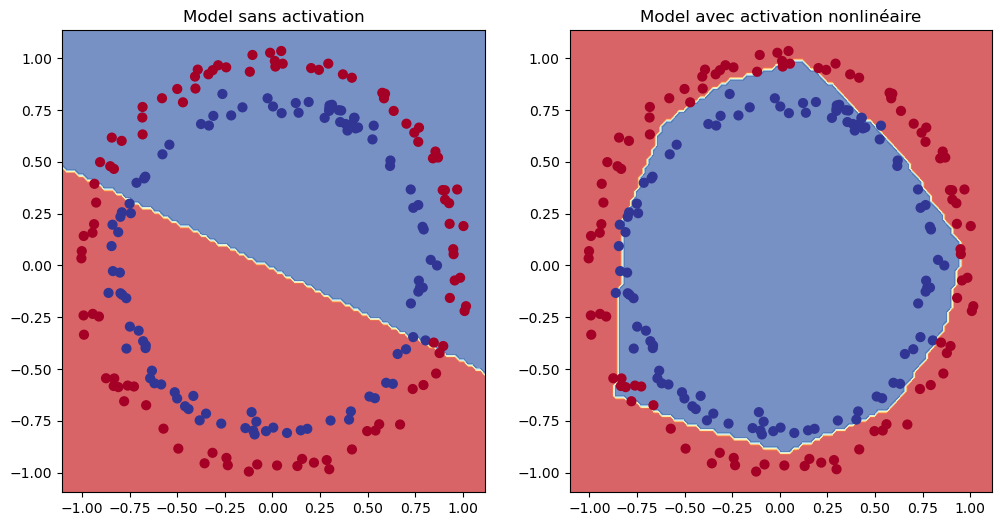

In [35]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Model sans activation")
plot_decision_boundary(model_1, X_test, y_test) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Model avec activation nonlinéaire")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

## 8. Rassembler les choses en créant un modèle PyTorch multi-classes

Nous en avons couvert pas mal.

Mais maintenant, rassemblons tout cela en utilisant un problème de classification multi-classes.

Rappelez-vous qu'un problème de **classification binaire** concerne la classification de quelque chose comme l'une des deux options (par exemple, une photo comme photo de chat ou photo de chien), tandis qu'un problème de **classification multiclasse** concerne la classification de quelque chose à partir d'une liste. de *plus de* deux options (par exemple, classer une photo comme un chat, un chien ou une poule).

![Image de classification binaire vs multi-classe avec l'exemple de chien vs chat pour la classification binaire et chien vs chat vs poulet pour la classification multi-classe](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-binary-vs-multi-class-classification.png)
*Exemple de classification binaire ou multiclasse. Le binaire traite deux classes (une chose ou une autre), alors que la classification multi-classes peut traiter n'importe quel nombre de classes sur deux, par exemple, le populaire [ensemble de données ImageNet-1k](https://www.image-net. org/) est utilisé comme référence en matière de vision par ordinateur et compte 1 000 classes.*

### 8.1 Création de données de classification multi-classes

Pour commencer un problème de classification multi-classes, créons des données multi-classes.

Pour ce faire, nous pouvons exploiter la méthode [`make_blobs()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) de Scikit-Learn.

Cette méthode créera autant de classes (en utilisant le paramètre `centers`) que nous le souhaitons.

Plus précisément, procédons comme suit :

1. Créez des données multi-classes avec `make_blobs()`.
2. Transformez les données en tenseurs (la valeur par défaut de `make_blobs()` est d'utiliser des tableaux NumPy).
3. Divisez les données en ensembles d'entraînement et de test à l'aide de `train_test_split()`.
4. Visualisez les données.

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


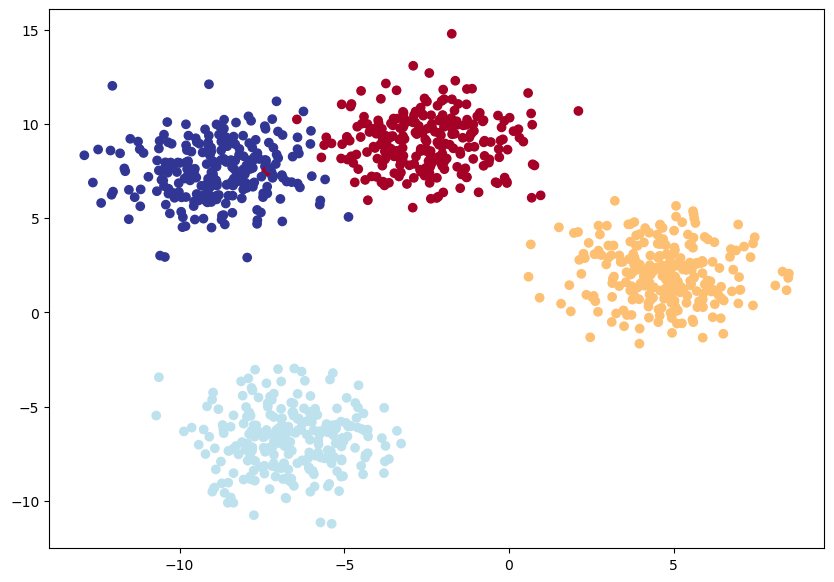

In [36]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

On dirait que nous avons des données multiclasses prêtes à être utilisées.

Construisons un modèle pour séparer les blobs colorés.

> **Question :** Cet ensemble de données nécessite-t-il une non-linéarité ? Ou pourriez-vous tracer une succession de lignes droites pour le séparer ?

### 8.2 Construire un modèle de classification multi-classes dans PyTorch

Nous avons jusqu'à présent créé quelques modèles dans PyTorch.

Vous commencez peut-être également à avoir une idée de la flexibilité des réseaux de neurones.

Que diriez-vous d'en construire un similaire à « model_3 » mais toujours capable de gérer des données multi-classes ?

Pour ce faire, créons une sous-classe de `nn.Module` qui prend trois hyperparamètres :
* `input_features` - le nombre de fonctionnalités `X` entrant dans le modèle.
* `output_features` - le nombre idéal de fonctionnalités de sortie que nous aimerions (cela sera équivalent à `NUM_CLASSES` ou au nombre de classes dans votre problème de classification multi-classes).
* `hidden_units` - le nombre de neurones cachés que nous aimerions que chaque couche cachée utilise.

Puisque nous mettons les choses ensemble, configurons un code indépendant du périphérique (nous n'avons pas besoin de refaire cela dans le même bloc-notes, ce n'est qu'un rappel).

Ensuite, nous créerons la classe modèle en utilisant les hyperparamètres ci-dessus.

In [37]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [38]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [39]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

### 8.4 Obtenir des probabilités de prédiction pour un modèle PyTorch multi-classes

Très bien, nous avons une fonction de perte et un optimiseur prêts, et nous sommes prêts à entraîner notre modèle, mais avant de le faire, faisons un seul passage en avant avec notre modèle pour voir s'il fonctionne.

In [40]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], grad_fn=<SliceBackward0>)

In [41]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

Notre modèle prédit une valeur pour chaque classe dont nous disposons.

Vous souvenez-vous du nom des sorties brutes de notre modèle ?

Si vous avez deviné *logits*, vous auriez raison.

Donc, pour le moment, notre modèle génère des logits, mais que se passerait-il si nous voulions déterminer exactement quelle étiquette donnait l'échantillon ?

Comme dans, comment passer de « logits -> probabilités de prédiction -> étiquettes de prédiction » comme nous l'avons fait avec le problème de classification binaire ?

C'est là que la [fonction d'activation softmax](https://en.wikipedia.org/wiki/Softmax_function) entre en jeu.

La fonction softmax calcule la probabilité que chaque classe de prédiction soit la classe réellement prédite par rapport à toutes les autres classes possibles.

Si cela n'a pas de sens, voyons dans le code.

In [42]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], grad_fn=<SliceBackward0>)


In [43]:
# Sum the first sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., grad_fn=<SumBackward0>)

Ces probabilités de prédiction indiquent essentiellement dans quelle mesure le modèle *pense* que l'échantillon cible « X » (l'entrée) correspond à chaque classe.

Puisqu'il y a une valeur pour chaque classe dans `y_pred_probs`, l'index de la valeur *la plus élevée* est la classe à laquelle le modèle pense que l'échantillon de données spécifique *la plupart* appartient.

Nous pouvons vérifier quel index a la valeur la plus élevée en utilisant `torch.argmax()`.

In [44]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], grad_fn=<SelectBackward0>)
tensor(3)


Vous pouvez voir le résultat de `torch.argmax()` renvoie 3, donc pour les caractéristiques (`X`) de l'échantillon à l'index 0, le modèle prédit que la valeur de classe la plus probable (`y`) est 3.

Bien sûr, pour le moment, il ne s'agit que d'une supposition aléatoire, donc il y a 25 % de chances d'avoir raison (puisqu'il y a quatre classes). Mais nous pouvons améliorer ces chances en entraînant le modèle.

> **Remarque :** Pour résumer ce qui précède, la sortie brute d'un modèle est appelée **logits**.
>
> Pour un problème de classification multi-classes, pour transformer les logits en **probabilités de prédiction**, vous utilisez la fonction d'activation softmax (`torch.softmax`).
>
> L'indice de la valeur avec la **probabilité de prédiction** la plus élevée est le numéro de classe que le modèle considère comme *le plus* probable étant donné les caractéristiques d'entrée de cet échantillon (bien qu'il s'agisse d'une prédiction, cela ne signifie pas qu'elle sera correcte ).

### 8.5 Création d'une boucle d'entrainement et de test pour un modèle PyTorch multi-classes

Très bien, maintenant que nous avons terminé toutes les étapes de préparation, écrivons une boucle de formation et de test pour améliorer et évaluer notre modèle.

Nous avons déjà effectué plusieurs de ces étapes auparavant, une grande partie de cela sera de la pratique.

La seule différence est que nous ajusterons les étapes pour transformer les sorties du modèle (logits) en probabilités de prédiction (en utilisant la fonction d'activation softmax), puis en étiquettes de prédiction (en prenant l'argmax de la sortie de la fonction d'activation softmax).

Entraîneons le modèle pour `epochs=100` et évaluons-le toutes les 10 époques.

In [45]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50% | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12% | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12% | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12% | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00% | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00% | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00% | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00% | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00% | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12% | Test Loss: 0.02423, Test Acc: 99.50%


### 8.6 Faire et évaluer des prédictions avec un modèle multi-classes PyTorch

Il semble que notre modèle entraîné fonctionne plutôt bien.

Mais pour nous en assurer, faisons quelques prédictions et visualisons-les.

In [46]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0727,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2891],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5310,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]])

D'accord, il semble que les prédictions de notre modèle soient toujours sous forme logit.

Mais pour les évaluer, il faudra qu'ils soient sous la même forme que nos étiquettes (`y_blob_test`) qui sont sous forme entière.

Convertissons les logits de prédiction de notre modèle en probabilités de prédiction (en utilisant `torch.softmax()`) puis en étiquettes de prédiction (en prenant le `argmax()` de chaque échantillon).

> **Remarque :** Il est possible de sauter la fonction `torch.softmax()` et de passer directement de `logits prédits -> étiquettes prédites` en appelant `torch.argmax()` directement sur les logits.
>
> Par exemple, `y_preds = torch.argmax(y_logits, dim=1)`, cela enregistre une étape de calcul (pas de `torch.softmax()`) mais n'entraîne aucune probabilité de prédiction disponible.

In [47]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])
Test accuracy: 99.5%


Bon! Les prédictions de notre modèle se présentent désormais sous la même forme que nos étiquettes de test.

Visualisons-les avec `plot_decision_boundary()`, rappelez-vous que parce que nos données sont sur le GPU, nous devrons les déplacer vers le CPU pour les utiliser avec matplotlib (`plot_decision_boundary()` le fait automatiquement pour nous).

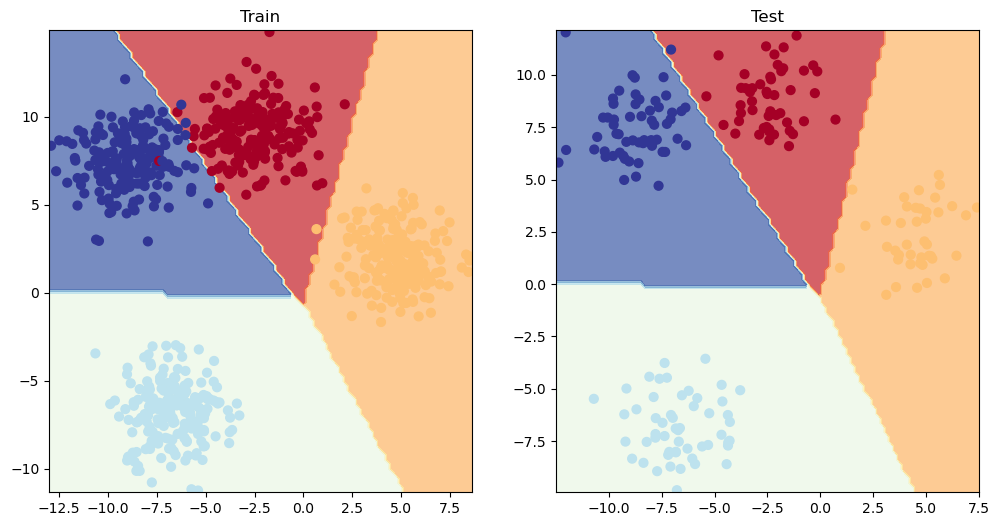

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9. More classification evaluation metrics

So far we've only covered a couple of ways of evaluating a classification model (accuracy, loss and visualizing predictions).

These are some of the most common methods you'll come across and are a good starting point.

However, you may want to evaluate your classification model using more metrics such as the following:

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`torchmetrics.Accuracy()`](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html#id3) or [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`torchmetrics.Precision()`](https://torchmetrics.readthedocs.io/en/stable/classification/precision.html#id4) or [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`torchmetrics.Recall()`](https://torchmetrics.readthedocs.io/en/stable/classification/recall.html#id5) or [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`torchmetrics.F1Score()`](https://torchmetrics.readthedocs.io/en/stable/classification/f1_score.html#f1score) or [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | [`torchmetrics.ConfusionMatrix`](https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html#confusionmatrix) or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

Scikit-Learn (a popular and world-class machine learning library) has many implementations of the above metrics and you're looking for a PyTorch-like version, check out [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/), especially the [TorchMetrics classification section](https://torchmetrics.readthedocs.io/en/stable/pages/classification.html).

Let's try the `torchmetrics.Accuracy` metric out.




In [49]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

AssertionError: 

## Des exercices

Tous les exercices sont axés sur la pratique du code dans les sections ci-dessus.

Vous devriez pouvoir les compléter en faisant référence à chaque section ou en suivant la ou les ressources liées.

Tous les exercices doivent être effectués en utilisant le [code agonistique de l'appareil](https://pytorch.org/docs/stable/notes/cuda.html#device-agnostic-code).

Ressources:
* [Cahier de modèles d'exercices pour 02](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb)
* [Exemple de cahier de solutions pour 02](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/02_pytorch_classification_exercise_solutions.ipynb) (essayez les exercices *avant* de regarder ceci)

1. Créez un ensemble de données de classification binaire avec la fonction [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) de Scikit-Learn.
     * Pour des raisons de cohérence, l'ensemble de données doit contenir 1 000 échantillons et un « random_state=42 ».
     * Transformez les données en tenseurs PyTorch. Divisez les données en ensembles de formation et de test à l'aide de « train_test_split » avec 80 % de formation et 20 % de tests.
2. Créez un modèle en sous-classant « nn.Module » qui intègre des fonctions d'activation non linéaires et est capable d'adapter les données que vous avez créées en 1.
     * N'hésitez pas à utiliser n'importe quelle combinaison de couches PyTorch (linéaires et non linéaires) de votre choix.
3. Configurez une fonction de perte et un optimiseur compatibles avec la classification binaire à utiliser lors de la formation du modèle.
4. Créez une boucle de formation et de test pour adapter le modèle que vous avez créé en 2 aux données que vous avez créées en 1.
     * Pour mesurer la précision du modèle, vous pouvez créer votre propre fonction de précision ou utiliser la fonction de précision dans [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
     * Entraînez le modèle suffisamment longtemps pour qu'il atteigne une précision supérieure à 96 %.
     * La boucle d'entraînement doit générer une progression toutes les 10 époques de perte et de précision de l'ensemble de test et d'entraînement du modèle.
5. Faites des prédictions avec votre modèle entraîné et tracez-les à l'aide de la fonction `plot_decision_boundary()` créée dans ce notebook.
6. Répliquez la fonction d'activation Tanh (tangente hyperbolique) dans PyTorch pur.
     * N'hésitez pas à référencer le [site Web ML cheatsheet](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) pour la formule.
7. Créez un ensemble de données multi-classes à l'aide de la [fonction de création de données spirales de CS231n](https://cs231n.github.io/neural-networks-case-study/) (voir ci-dessous pour le code).
     * Construisez un modèle capable d'ajuster les données (vous aurez peut-être besoin d'une combinaison de couches linéaires et non linéaires).
     * Créez une fonction de perte et un optimiseur capable de gérer des données multi-classes (extension facultative : utilisez l'optimiseur Adam au lieu de SGD, vous devrez peut-être expérimenter différentes valeurs du taux d'apprentissage pour le faire fonctionner).
     * Créez une boucle de formation et de test pour les données multi-classes et entraînez un modèle dessus pour atteindre une précision de test supérieure à 95 % (vous pouvez utiliser ici n'importe quelle fonction de mesure de précision que vous souhaitez).
     * Tracez les limites de décision sur l'ensemble de données des spirales à partir des prédictions de votre modèle, la fonction `plot_decision_boundary()` devrait également fonctionner pour cet ensemble de données.

```python
# Code pour créer un jeu de données en spirale à partir de CS231n
importer numpy en tant que np
N = 100 # nombre de points par classe
D = 2 # dimensionnalité
K = 3 # nombre de classes
X = np.zeros((N*K,D)) # matrice de données (chaque ligne = exemple unique)
y = np.zeros(N*K, dtype='uint8') # étiquettes de classe
pour j dans la plage (K):
   ix = plage(N*j,N*(j+1))
   r = np.linspace(0.0,1,N) # rayon
   t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # thêta
   X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
   y[ix] = j
# visualisons les données
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()
```

## Extra-scolaire

* Notez 3 problèmes pour lesquels vous pensez que la classification automatique pourrait être utile (ceux-ci peuvent être n'importe quoi, faites preuve de créativité à votre guise, par exemple, classer les transactions par carte de crédit comme fraudes ou non en fonction du montant de l'achat et des caractéristiques du lieu d'achat).
* Recherchez le concept de « momentum » dans les optimiseurs basés sur le gradient (comme SGD ou Adam), qu'est-ce que cela signifie ?
* Passez 10 minutes à lire la [page Wikipédia pour les différentes fonctions d'activation](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions), combien d'entre elles pouvez-vous aligner avec les [fonctions d'activation de PyTorch](https : //pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity) ?
* Recherchez quand la précision pourrait être une mauvaise mesure à utiliser (indice : lisez ["Au-delà de la précision" par Will Koehrsen](https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/ ) pour des idées).
* **Regardez :** Pour avoir une idée de ce qui se passe au sein de nos réseaux de neurones et de ce qu'ils font pour apprendre, regardez la [vidéo d'introduction au Deep Learning du MIT](https://youtu.be/7sB052Pz0sQ).